## Imports 

In [68]:
! pip install -q tensorflow-model-optimization


In [69]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras
import os
import matplotlib.pyplot as plt

import tempfile

## Load dataset Directory

In [70]:
# !unzip archive.zip -d /content/dataset

## Load Dataset

In [71]:
train_df=pd.read_csv(os.getcwd( )+'/sign_mnist_train.csv')
test_df=pd.read_csv(os.getcwd( )+'/sign_mnist_test.csv')

In [72]:
 test_df.loc[:8, "label"]

0     6
1     5
2    10
3     0
4     3
5    21
6    10
7    14
8     3
Name: label, dtype: int64

In [73]:
train_df_images = train_df.loc[:, "pixel1":]
train_df_label = train_df.loc[:, "label"]

test_df_images = test_df.loc[:, "pixel1":]
test_df_label  = test_df.loc[:, "label"]

In [74]:
test_df_images=test_df_images/255.0
train_df_images=train_df_images/255.0

In [75]:
class_names = ['A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'J','K','L','M','N','O','P','Q','R','S','T','V','W','X','Y','Z']

class_names[0]

'A'

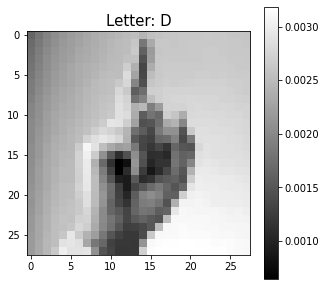

In [76]:
data_array = np.array(train_df_images.loc[0, :])
shaped_data = np.reshape(data_array, (28, 28))

plt.figure(figsize = (5,5))
sign_img = plt.imshow(shaped_data/255.0, cmap=plt.cm.gray)
plt.colorbar(sign_img)
plt.title("Letter: "+class_names[train_df_label[0]], fontsize=15)
plt.show()

In [77]:
train_df_images = np.array(train_df_images)
test_df_images = np.array(test_df_images)

train_df_images = train_df_images.reshape(train_df_images.shape[0], 28, 28, 1)
test_df_images = test_df_images.reshape(test_df_images.shape[0], 28, 28, 1)

print(train_df_images.shape, test_df_images.shape)

(27455, 28, 28, 1) (7172, 28, 28, 1)


In [78]:
nclasses = train_df_label.min()
nclasses

0

In [79]:
nclasses = train_df_label.max() - train_df_label.min() + 1
train_df_label = tf.keras.utils.to_categorical(train_df_label, num_classes = nclasses)
print("Shape of ytrain after encoding: ", train_df_label.shape)


Shape of ytrain after encoding:  (27455, 25)


In [80]:

test_df_label = tf.keras.utils.to_categorical(test_df_label, num_classes = nclasses)
print("Shape of ytest after encoding: ", test_df_label.shape)

Shape of ytest after encoding:  (7172, 25)


## Visualize data

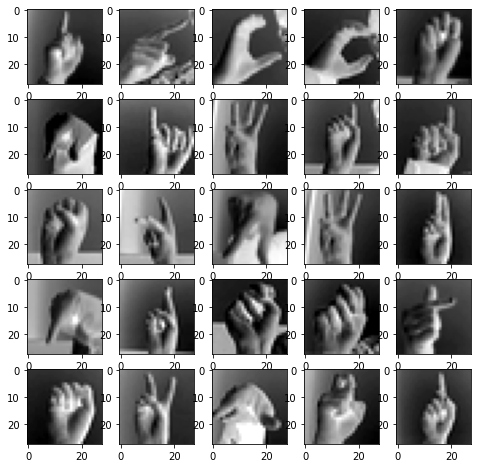

In [81]:
w=10
h=10
fig=plt.figure(figsize=(8,8))
columns = 5
rows = 5
for i in range(0, columns*rows):
    img = train_df_images[i]
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
plt.show()



## Create Model

In [82]:
model = keras.Sequential([
    keras.layers.Conv2D(24, (5, 5), padding = "same", input_shape=(28,28,1)),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(32, (5, 5), padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (5, 5), padding = "same"),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(128, (5, 5), padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),


    keras.layers.Conv2D(128, (5, 5), padding = "same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(256, (5, 5), padding = "same"), 
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(1024,kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Activation('relu'),

    keras.layers.Dense(25, activation='softmax'),
    ])


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 24)        624       
_________________________________________________________________
activation_14 (Activation)   (None, 28, 28, 24)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        19232     
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)       

## Compile and Train

In [83]:
sgd = keras.optimizers.SGD(lr=1e-2)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

In [84]:
history = model.fit(train_df_images, train_df_label, epochs=10, validation_split=0.2)

Epoch 1/10
687/687 [==============================] - 4s 6ms/step - loss: 13.0136 - accuracy: 0.8297 - val_loss: 10.8635 - val_accuracy: 0.9927
Epoch 2/10
687/687 [==============================] - 4s 6ms/step - loss: 9.4740 - accuracy: 0.9987 - val_loss: 8.2185 - val_accuracy: 1.0000
Epoch 3/10
687/687 [==============================] - 4s 6ms/step - loss: 7.1997 - accuracy: 0.9998 - val_loss: 6.2505 - val_accuracy: 1.0000
Epoch 4/10
687/687 [==============================] - 4s 6ms/step - loss: 5.4758 - accuracy: 1.0000 - val_loss: 4.7536 - val_accuracy: 1.0000
Epoch 5/10
687/687 [==============================] - 4s 6ms/step - loss: 4.1670 - accuracy: 1.0000 - val_loss: 3.6175 - val_accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 4s 6ms/step - loss: 3.1734 - accuracy: 1.0000 - val_loss: 2.7547 - val_accuracy: 1.0000
Epoch 7/10
687/687 [==============================] - 4s 6ms/step - loss: 2.4183 - accuracy: 1.0000 - val_loss: 2.0990 - val_accuracy: 1.0000
Epoc

Text(0.5, 1.0, 'Loss')

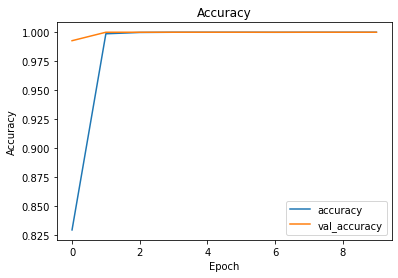

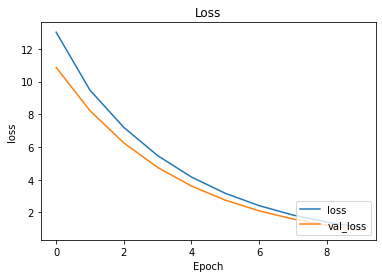

In [85]:
plt.figure(1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Accuracy")

plt.figure(2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Loss")


## Evaluate and predict using the model


In [86]:

_, baseline_model_accuracy = model.evaluate(test_df_images, test_df_label, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)

_, keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model, keras_file, include_optimizer=False)
print('Saved baseline model to:', keras_file)

Baseline test accuracy: 0.9825711250305176
Saved baseline model to: /tmp/tmpyzgzm614.h5


In [87]:
predictions = model.predict(test_df_images)

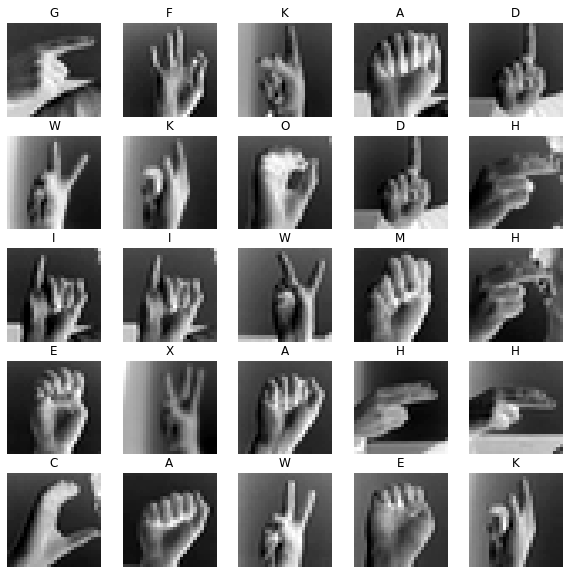

In [88]:
plt.figure(figsize=(10,10))
columns = 5
rows = 5
for i in range(0, columns*rows):
    img = test_df_images[i]    
    plt.subplot(rows, columns,i+1)
    plt.grid(False)
    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
    plt.title(class_names[np.argmax(predictions[i])])
    plt.axis('off')
plt.show()


In [90]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 128
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set. 

num_images = test_df_images.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

sgd = keras.optimizers.SGD(lr=1e-2)
# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])



model_for_pruning.summary()

Instructions for updating:
Please use `layer.add_weight` method instead.


Instructions for updating:
Please use `layer.add_weight` method instead.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_conv2d_1 (None, 28, 28, 24)        1226      
_________________________________________________________________
prune_low_magnitude_activati (None, 28, 28, 24)        1         
_________________________________________________________________
prune_low_magnitude_conv2d_1 (None, 28, 28, 32)        38434     
_________________________________________________________________
prune_low_magnitude_batch_no (None, 28, 28, 32)        129       
_________________________________________________________________
prune_low_magnitude_activati (None, 28, 28, 32)        1         
_________________________________________________________________
prune_low_magnitude_max_pool (None, 14, 14, 32)        1         
_________________________________________________________________
prune_low_magnitude_dropout_ (None, 14, 14, 32)       

In [91]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]
  
model_for_pruning.fit(train_df_images, train_df_label, epochs=10, validation_split=0.2,  callbacks=callbacks)



Epoch 1/10
  1/687 [..............................] - ETA: 0s - loss: 0.9192 - accuracy: 1.0000WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


  2/687 [..............................] - ETA: 34s - loss: 0.9275 - accuracy: 0.9844WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0169s vs `on_train_batch_end` time: 0.0766s). Check your callbacks.


687/687 [==============================] - 12s 18ms/step - loss: 0.6625 - accuracy: 0.9908 - val_loss: 0.4489 - val_accuracy: 1.0000
Epoch 2/10
687/687 [==============================] - 13s 19ms/step - loss: 0.4157 - accuracy: 0.9994 - val_loss: 0.3500 - val_accuracy: 1.0000
Epoch 3/10
687/687 [==============================] - 12s 17ms/step - loss: 0.3294 - accuracy: 0.9999 - val_loss: 0.2826 - val_accuracy: 1.0000
Epoch 4/10
687/687 [==============================] - 11s 17ms/step - loss: 0.2679 - accuracy: 1.0000 - val_loss: 0.2306 - val_accuracy: 1.0000
Epoch 5/10
687/687 [==============================] - 11s 17ms/step - loss: 0.2207 - accuracy: 1.0000 - val_loss: 0.1902 - val_accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 11s 17ms/step - loss: 0.1849 - accuracy: 1.0000 - val_loss: 0.1595 - val_accuracy: 1.0000
Epoch 7/10
687/687 [==============================] - 11s 17ms/step - loss: 0.1570 - accuracy: 1.0000 - val_loss: 0.1362 - val_accuracy: 1.0000
Epo

In [92]:
_, model_for_pruning_accuracy = model_for_pruning.evaluate(test_df_images, test_df_label, verbose=0)
print('Baseline test accuracy:', baseline_model_accuracy) 
print('Pruned test accuracy:', model_for_pruning_accuracy)

Baseline test accuracy: 0.9825711250305176
Pruned test accuracy: 0.9857780337333679


In [93]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

Saved pruned Keras model to: /tmp/tmp5cl93bf5.h5


In [94]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
pruned_tflite_model = converter.convert()

_, pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(pruned_tflite_file, 'wb') as f:
  f.write(pruned_tflite_model)

print('Saved pruned TFLite model to:', pruned_tflite_file)

INFO:tensorflow:Assets written to: /tmp/tmpftpp0zdl/assets


INFO:tensorflow:Assets written to: /tmp/tmpftpp0zdl/assets


Saved pruned TFLite model to: /tmp/tmp99668km1.tflite


In [95]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [96]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(train_df_images.astype(np.float32)).batch(1).take(100):
    yield [input_value]

In [97]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen

# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
quantized_and_pruned_tflite_model = converter.convert()

_, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_pruned_tflite_file, 'wb') as f:
  f.write(quantized_and_pruned_tflite_model)

print('Saved quantized and pruned TFLite model to:', quantized_and_pruned_tflite_file)

print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

INFO:tensorflow:Assets written to: /tmp/tmpt_ofwsgu/assets


INFO:tensorflow:Assets written to: /tmp/tmpt_ofwsgu/assets


Saved quantized and pruned TFLite model to: /tmp/tmp_gz36q9g.tflite
Size of gzipped baseline Keras model: 14374320.00 bytes
Size of gzipped pruned and quantized TFlite model: 1304731.00 bytes


In [98]:
def run_tflite_model(tflite_file, test_image_indices):
  global test_df_images
  
  # Initialize the interpreter
  interpreter = tf.lite.Interpreter(str(tflite_file))
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = np.zeros((len(test_image_indices),), dtype=int)
  for i, test_image_index in enumerate(test_image_indices):
    
    test_image = test_df_images[test_image_index]
    test_label = test_df_images[test_image_index]

    # Check if the input type is quantized, then rescale input data to uint8
    if input_details['dtype'] == np.uint8:
      input_scale, input_zero_point = input_details["quantization"]
      test_image = test_image / input_scale + input_zero_point

    test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
    interpreter.set_tensor(input_details["index"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]

    predictions[i] = output.argmax()
    # print(str(predictions[i]))
  return predictions

In [99]:
def evaluate_model(tflite_file, model_type):
  global test_df_images
  global test_df_label

  test_image_indices = range(test_df_images.shape[0])
  predictions = run_tflite_model(tflite_file, test_image_indices)

 
  return predictions

In [100]:
prediction_int= evaluate_model(quantized_and_pruned_tflite_file, model_type="Quantized")


In [101]:
accurate_count = 0
accuracy = 0 
for index in range(len(prediction_int)):
  # data = np.argmax(predictions_int8[index])
  if prediction_int[index] == np.argmax(test_df_label[index]):
    accurate_count += 1
accuracy_int = accurate_count * 1.0 / len(prediction_int)


In [102]:
print('Pruned and quantized TFLite test_accuracy:', accuracy_int)
print('Pruned TF test accuracy:', model_for_pruning_accuracy)

Pruned and quantized TFLite test_accuracy: 0.9864751812604573
Pruned TF test accuracy: 0.9857780337333679
